# Modelling #2

In this notebook, I'll be completing the modelling section of my project.

## Data Loading

In [2]:
import pandas as pd
pd.set_option('display.max_columns', 100)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
X_train_s = pd.read_pickle('data1/X_train_s.pkl')
X_val_s = pd.read_pickle('data1/X_val_s.pkl')
X_test_s = pd.read_pickle('data1/X_test_s.pkl')
y_train = pd.read_pickle('data1/y_train.pkl')
y_val = pd.read_pickle('data1/y_val.pkl')
y_test = pd.read_pickle('data1/y_test.pkl')
df=pd.read_pickle("data1/df.pkl")

### Dealing with `highest_ever_market_value`

There is a big issue with the feature `highest_ever_market_value`.

What would I do if I had a player in my dataset without a prior valuation? I wouldnt be able to put them into my model. This is detrimental as one of the primary reasons for the development of this model is to get new players valuated efficiently and accurately. This information is also not always readily available and so I will proceed to drop it.

In [4]:
#drop collumns
X_train_s=X_train_s.drop("highest_ever_market_value",axis=1)
X_test_s=X_test_s.drop("highest_ever_market_value",axis=1)
X_val_s=X_val_s.drop("highest_ever_market_value",axis=1)

### Remodeling with dropped feature

We will need to re-fit our model on the training set now that `Highest_Ever_Market_Value` has been dropped, The ramifications of this will likely be a lower score in all my listed metrics which is unfortunate but neccessary for the sake of my problem.

In [7]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

#instantiate
dtcv2 = DecisionTreeRegressor()

# Define the parameter grid
paramgrid = {
    "max_depth": [15,20,25,30,35],
    "min_samples_split": [2, 4, 6, 8, 10],
    "min_samples_leaf": [1, 2, 4],
    "criterion": ["squared_error"],
}

#fit
gridsearch2 = GridSearchCV(dtcv2, paramgrid,verbose=3, cv=5)
gridsearch2.fit(X_train_s, y_train)


Fitting 5 folds for each of 75 candidates, totalling 375 fits
[CV 1/5] END criterion=squared_error, max_depth=15, min_samples_leaf=1, min_samples_split=2;, score=0.755 total time=   2.8s
[CV 2/5] END criterion=squared_error, max_depth=15, min_samples_leaf=1, min_samples_split=2;, score=0.772 total time=   2.7s
[CV 3/5] END criterion=squared_error, max_depth=15, min_samples_leaf=1, min_samples_split=2;, score=0.746 total time=   2.6s
[CV 4/5] END criterion=squared_error, max_depth=15, min_samples_leaf=1, min_samples_split=2;, score=0.739 total time=   2.8s
[CV 5/5] END criterion=squared_error, max_depth=15, min_samples_leaf=1, min_samples_split=2;, score=0.776 total time=   2.5s
[CV 1/5] END criterion=squared_error, max_depth=15, min_samples_leaf=1, min_samples_split=4;, score=0.758 total time=   2.6s
[CV 2/5] END criterion=squared_error, max_depth=15, min_samples_leaf=1, min_samples_split=4;, score=0.774 total time=   2.8s
[CV 3/5] END criterion=squared_error, max_depth=15, min_samples

[CV 1/5] END criterion=squared_error, max_depth=15, min_samples_leaf=4, min_samples_split=8;, score=0.753 total time=   2.8s
[CV 2/5] END criterion=squared_error, max_depth=15, min_samples_leaf=4, min_samples_split=8;, score=0.754 total time=   2.2s
[CV 3/5] END criterion=squared_error, max_depth=15, min_samples_leaf=4, min_samples_split=8;, score=0.758 total time=   2.5s
[CV 4/5] END criterion=squared_error, max_depth=15, min_samples_leaf=4, min_samples_split=8;, score=0.743 total time=   2.8s
[CV 5/5] END criterion=squared_error, max_depth=15, min_samples_leaf=4, min_samples_split=8;, score=0.753 total time=   2.7s
[CV 1/5] END criterion=squared_error, max_depth=15, min_samples_leaf=4, min_samples_split=10;, score=0.750 total time=   3.0s
[CV 2/5] END criterion=squared_error, max_depth=15, min_samples_leaf=4, min_samples_split=10;, score=0.752 total time=   2.6s
[CV 3/5] END criterion=squared_error, max_depth=15, min_samples_leaf=4, min_samples_split=10;, score=0.758 total time=   2.

[CV 2/5] END criterion=squared_error, max_depth=20, min_samples_leaf=4, min_samples_split=4;, score=0.771 total time=   3.2s
[CV 3/5] END criterion=squared_error, max_depth=20, min_samples_leaf=4, min_samples_split=4;, score=0.768 total time=   3.1s
[CV 4/5] END criterion=squared_error, max_depth=20, min_samples_leaf=4, min_samples_split=4;, score=0.761 total time=   2.9s
[CV 5/5] END criterion=squared_error, max_depth=20, min_samples_leaf=4, min_samples_split=4;, score=0.777 total time=   2.8s
[CV 1/5] END criterion=squared_error, max_depth=20, min_samples_leaf=4, min_samples_split=6;, score=0.768 total time=   3.1s
[CV 2/5] END criterion=squared_error, max_depth=20, min_samples_leaf=4, min_samples_split=6;, score=0.770 total time=   3.1s
[CV 3/5] END criterion=squared_error, max_depth=20, min_samples_leaf=4, min_samples_split=6;, score=0.768 total time=   3.3s
[CV 4/5] END criterion=squared_error, max_depth=20, min_samples_leaf=4, min_samples_split=6;, score=0.753 total time=   3.2s


[CV 3/5] END criterion=squared_error, max_depth=25, min_samples_leaf=2, min_samples_split=10;, score=0.777 total time=   4.2s
[CV 4/5] END criterion=squared_error, max_depth=25, min_samples_leaf=2, min_samples_split=10;, score=0.744 total time=   3.9s
[CV 5/5] END criterion=squared_error, max_depth=25, min_samples_leaf=2, min_samples_split=10;, score=0.779 total time=   4.0s
[CV 1/5] END criterion=squared_error, max_depth=25, min_samples_leaf=4, min_samples_split=2;, score=0.768 total time=   4.0s
[CV 2/5] END criterion=squared_error, max_depth=25, min_samples_leaf=4, min_samples_split=2;, score=0.772 total time=   3.7s
[CV 3/5] END criterion=squared_error, max_depth=25, min_samples_leaf=4, min_samples_split=2;, score=0.766 total time=   3.7s
[CV 4/5] END criterion=squared_error, max_depth=25, min_samples_leaf=4, min_samples_split=2;, score=0.756 total time=   4.0s
[CV 5/5] END criterion=squared_error, max_depth=25, min_samples_leaf=4, min_samples_split=2;, score=0.767 total time=   4.

[CV 4/5] END criterion=squared_error, max_depth=30, min_samples_leaf=2, min_samples_split=6;, score=0.748 total time=   5.2s
[CV 5/5] END criterion=squared_error, max_depth=30, min_samples_leaf=2, min_samples_split=6;, score=0.766 total time=   5.1s
[CV 1/5] END criterion=squared_error, max_depth=30, min_samples_leaf=2, min_samples_split=8;, score=0.763 total time=   4.4s
[CV 2/5] END criterion=squared_error, max_depth=30, min_samples_leaf=2, min_samples_split=8;, score=0.783 total time=   5.3s
[CV 3/5] END criterion=squared_error, max_depth=30, min_samples_leaf=2, min_samples_split=8;, score=0.771 total time=   5.2s
[CV 4/5] END criterion=squared_error, max_depth=30, min_samples_leaf=2, min_samples_split=8;, score=0.742 total time=   4.4s
[CV 5/5] END criterion=squared_error, max_depth=30, min_samples_leaf=2, min_samples_split=8;, score=0.778 total time=   5.0s
[CV 1/5] END criterion=squared_error, max_depth=30, min_samples_leaf=2, min_samples_split=10;, score=0.764 total time=   5.0s

[CV 5/5] END criterion=squared_error, max_depth=35, min_samples_leaf=2, min_samples_split=2;, score=0.768 total time=   5.1s
[CV 1/5] END criterion=squared_error, max_depth=35, min_samples_leaf=2, min_samples_split=4;, score=0.772 total time=   5.0s
[CV 2/5] END criterion=squared_error, max_depth=35, min_samples_leaf=2, min_samples_split=4;, score=0.786 total time=   4.6s
[CV 3/5] END criterion=squared_error, max_depth=35, min_samples_leaf=2, min_samples_split=4;, score=0.773 total time=   4.9s
[CV 4/5] END criterion=squared_error, max_depth=35, min_samples_leaf=2, min_samples_split=4;, score=0.741 total time=   5.0s
[CV 5/5] END criterion=squared_error, max_depth=35, min_samples_leaf=2, min_samples_split=4;, score=0.781 total time=   4.5s
[CV 1/5] END criterion=squared_error, max_depth=35, min_samples_leaf=2, min_samples_split=6;, score=0.763 total time=   4.6s
[CV 2/5] END criterion=squared_error, max_depth=35, min_samples_leaf=2, min_samples_split=6;, score=0.783 total time=   4.6s


GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error'],
                         'max_depth': [15, 20, 25, 30, 35],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 4, 6, 8, 10]},
             verbose=3)

**sidenote** :Reran my gridsearch after it gave me the largest max depth that i fed into it again so just tweaked parameter grid. Previous maximum depth choices were 5,10,15,20,25.

In [23]:
#get best hyperparameters and their corresponding score
bestscore2 = gridsearch2.best_score_
bestmodel2 = gridsearch2.best_estimator_
bestparams2=gridsearch2.best_params_

print(bestscore2)
print(bestmodel2)
print(bestparams2)

0.7722272249364548
DecisionTreeRegressor(max_depth=25, min_samples_split=6)
{'criterion': 'squared_error', 'max_depth': 25, 'min_samples_leaf': 1, 'min_samples_split': 6}


From the gridsearch, We can see that the optimal hyperparameters for my best decision tree model post-dropping the most important feature is quite different. the optimal max_depth is now 25  and the min_sample_split is 6 as opposed to the previous max depth of 15 & min_sample_leaf of 2.

In [24]:
#instantiate
bestdt2=DecisionTreeRegressor(max_depth=25,min_samples_split=6,min_samples_leaf=1,criterion="squared_error")

#fit
bestdt2.fit(X_train_s,y_train)

# Predictions
y_train_pred = bestdt2.predict(X_train_s)
y_val_pred = bestdt2.predict(X_val_s)

#Score
#Train
print(bestdt2.score(X_train_s,y_train))

#Val
print(bestdt2.score(X_val_s,y_val))

0.9759699173926214
0.8464299199904584


In [26]:
from sklearn.metrics import mean_absolute_error

#calculate MAE
mae_train = mean_absolute_error(y_train, y_train_pred)
mae_val = mean_absolute_error(y_val, y_val_pred)

#calculate MAPe
percentage_error_train = mean_absolute_error(y_train, y_train_pred) / y_train.mean() * 100
percentage_error_val = mean_absolute_error(y_val, y_val_pred) / y_val.mean() * 100


print("\nTrain MAE:", round(mae_train))
print("Validation MAE:",round(mae_val))

print(f"\nTrain MAPE:{round(percentage_error_train)}%")
print(f"Validation MAPE:{round(percentage_error_val)}%")


Train MAE: 672229
Validation MAE: 1699409

Train MAPE:13%
Validation MAPE:34%


Suprisingly the MAPE and MAE on the train set is quite a bit lower than before suggesting that my model is better in that regard. The validation MAPE and MAE however stays relatively the same.

### New Feature Importance

In [29]:
#get the feature importance for my best model
feature_importance = bestdt2.feature_importances_

# set up a dataframe
importance_df = pd.DataFrame({'Feature': X_train_s.columns, 'Importance': feature_importance})

#sort in desc order
importance_df = importance_df.sort_values(by='Importance', ascending=False)

#display the feature importances
importance_df

,Feature,Importance
13,national_team_players,0.281769
10,minutes_played,0.211010
6,goals,0.089967
12,net_transfer_record,0.057348
5,year,0.049088
...,...,...
66,Country_Scotland,0.000118
47,league_id_UKR1,0.000113
27,sub_position_Left Midfield,0.000091
57,Country_Greece,0.000078


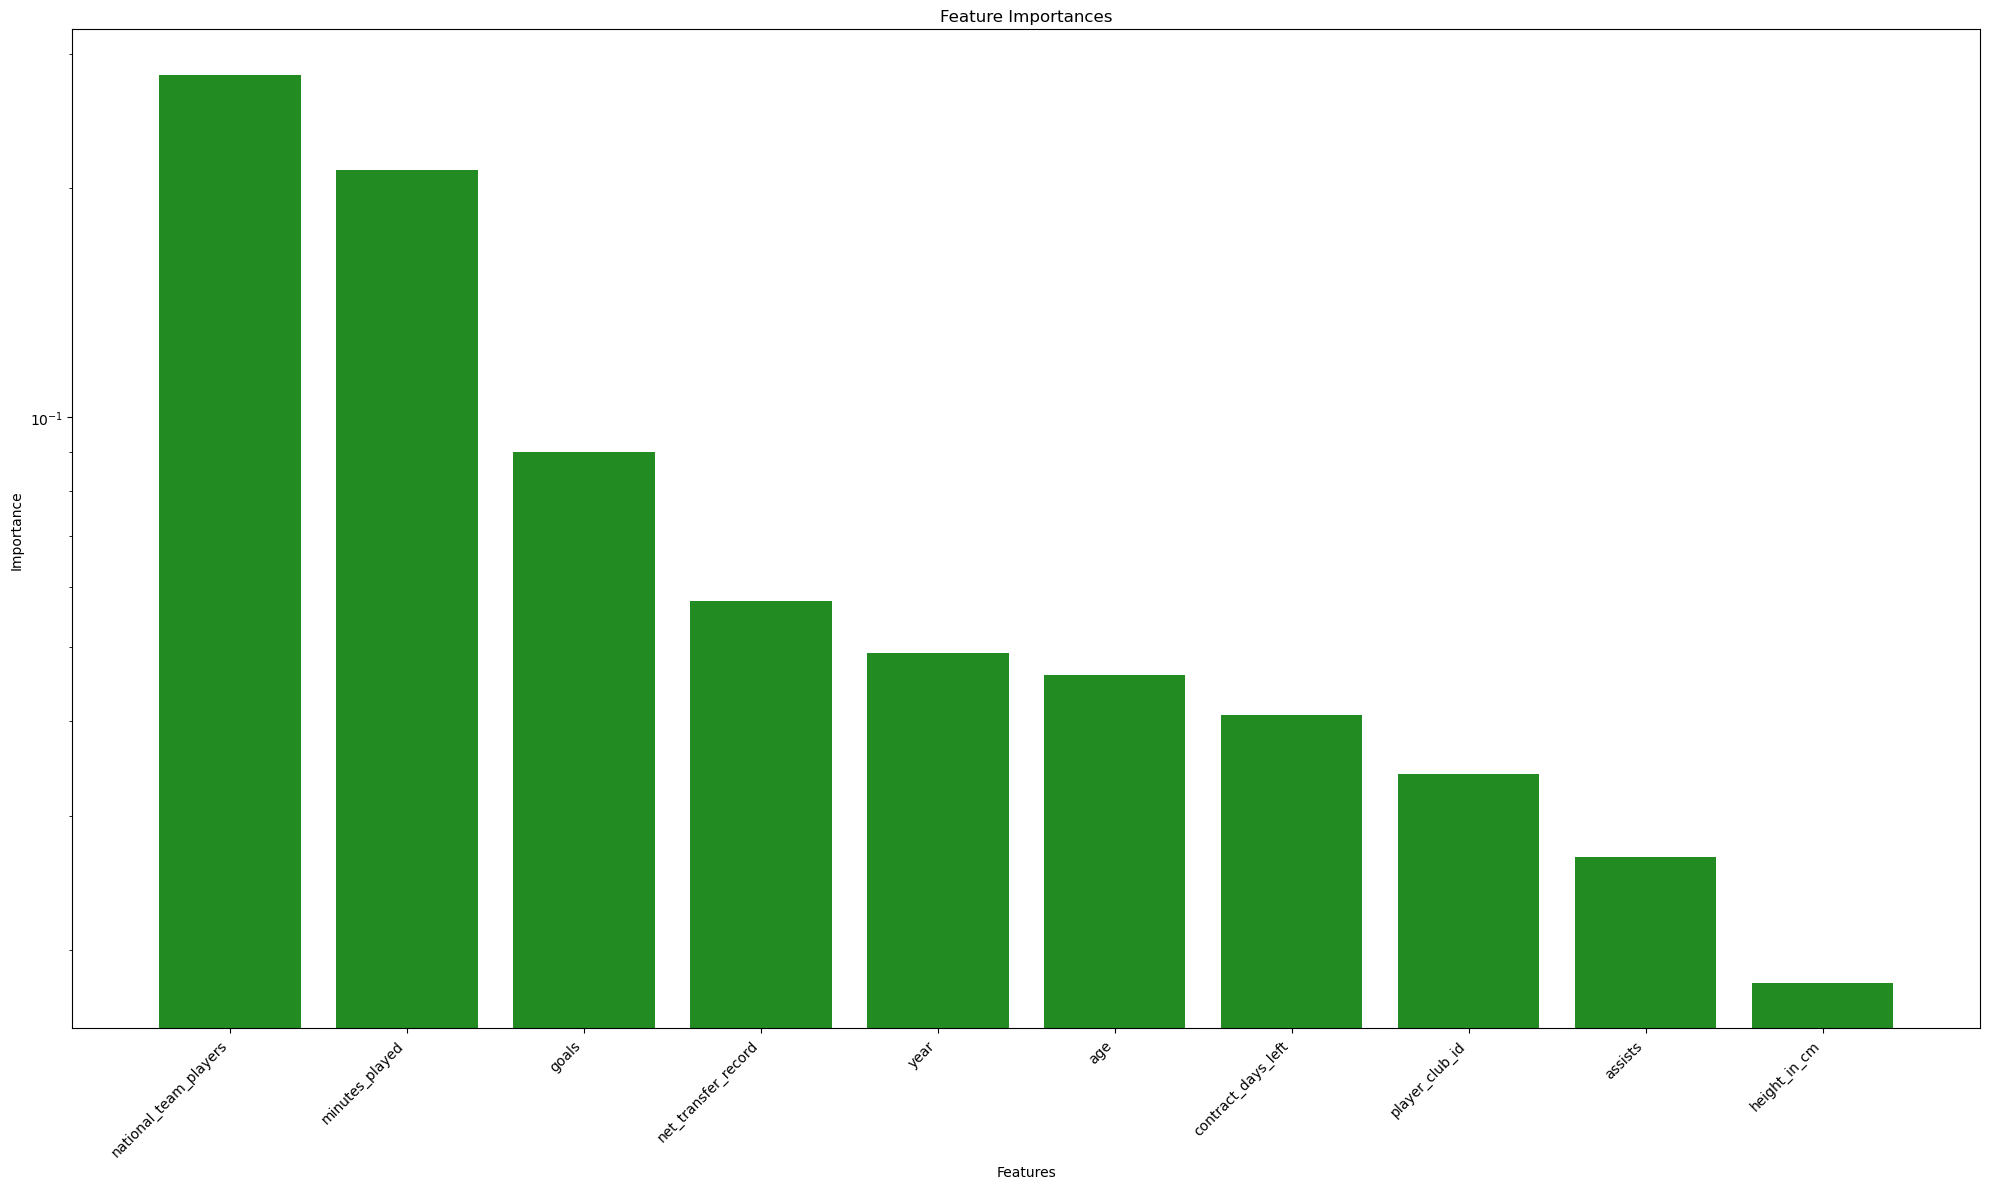

In [31]:
#filter rows where importance  not 0
filtered_importance_df = importance_df[importance_df['Importance'] > 0]

#create stacked bar chart
plt.figure(figsize=(20, 12))
plt.bar(filtered_importance_df['Feature'].head(10), filtered_importance_df['Importance'].head(10), color='forestgreen')


# log scale my y axis
plt.yscale('log')

#layout graphing
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importances')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


## Ensemble Learning

My cross validated non-linear model has a quite a decent R-Squared Score & MAE but I still think this can be improved upon and hence I'll be deploying ensemble learning to try to get the optimal model for my problem.

## XGBoost

### Unoptimised XGBoost Model

In [10]:
#import XGBoost Regressor
from xgboost import XGBRegressor

#instantiate  & fit
xmodel=XGBRegressor()
xmodel.fit(X_train_s,y_train)

#score
print(xmodel.score(X_train_s,y_train))
print(xmodel.score(X_val_s,y_val))

0.9050514812770661
0.852894900090049


My baseline XGBoost model seems to have quite a similar validation score to the baseline Decision Tree Model except this time it isn't overfitted on my trainset with a score 0.9 as opposed to the almost perfect score in the other models. This looks promising but I should still be looking to increase that validation score through optimising my hyperparameters.

### XGBoost GridSearch

to optimise my hyperparameters, I'll do a Cross-validated Gridsearch like before.

The hyperparameters I'll be tuning are:
- `learning_rate` - how fast the model learns from the residuals of the previous tree.
- `n_estimators` - the number of boosts to perform.
- `max_depth` - how deep each tree can go.
- `min_child_weight`- ...
- `subsample`- ...

In [17]:
#instantiate xgboost
xgb2=XGBRegressor()

#set up my parameter grid
xparamgrid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200, 300,400],
    'max_depth': [3, 5, 7, 9],
    'min_child_weight': [1, 5, 10],
    'subsample': [0.8, 0.9, 1.0],
}


In [18]:
#gridsearch
xgbgridsearch = GridSearchCV(xgb2,
                        xparamgrid,
                        cv = 5,
                        verbose=3)


xgbgridsearch.fit(X_train_s,y_train)


Fitting 5 folds for each of 432 candidates, totalling 2160 fits
[CV 1/5] END learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=100, subsample=0.8;, score=0.416 total time=   1.3s
[CV 2/5] END learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=100, subsample=0.8;, score=0.420 total time=   1.4s
[CV 3/5] END learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=100, subsample=0.8;, score=0.431 total time=   1.3s
[CV 4/5] END learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=100, subsample=0.8;, score=0.424 total time=   1.3s
[CV 5/5] END learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=100, subsample=0.8;, score=0.428 total time=   1.4s
[CV 1/5] END learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=100, subsample=0.9;, score=0.415 total time=   1.3s
[CV 2/5] END learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=100, subsample=0.9;, score=0.418 total time=   1.3s
[CV 3/5] END learni

[CV 4/5] END learning_rate=0.01, max_depth=3, min_child_weight=5, n_estimators=100, subsample=0.8;, score=0.424 total time=   1.3s
[CV 5/5] END learning_rate=0.01, max_depth=3, min_child_weight=5, n_estimators=100, subsample=0.8;, score=0.428 total time=   1.3s
[CV 1/5] END learning_rate=0.01, max_depth=3, min_child_weight=5, n_estimators=100, subsample=0.9;, score=0.415 total time=   1.3s
[CV 2/5] END learning_rate=0.01, max_depth=3, min_child_weight=5, n_estimators=100, subsample=0.9;, score=0.418 total time=   1.4s
[CV 3/5] END learning_rate=0.01, max_depth=3, min_child_weight=5, n_estimators=100, subsample=0.9;, score=0.431 total time=   1.4s
[CV 4/5] END learning_rate=0.01, max_depth=3, min_child_weight=5, n_estimators=100, subsample=0.9;, score=0.422 total time=   1.3s
[CV 5/5] END learning_rate=0.01, max_depth=3, min_child_weight=5, n_estimators=100, subsample=0.9;, score=0.427 total time=   1.3s
[CV 1/5] END learning_rate=0.01, max_depth=3, min_child_weight=5, n_estimators=100,

[CV 2/5] END learning_rate=0.01, max_depth=3, min_child_weight=10, n_estimators=100, subsample=0.9;, score=0.418 total time=   1.3s
[CV 3/5] END learning_rate=0.01, max_depth=3, min_child_weight=10, n_estimators=100, subsample=0.9;, score=0.431 total time=   1.6s
[CV 4/5] END learning_rate=0.01, max_depth=3, min_child_weight=10, n_estimators=100, subsample=0.9;, score=0.422 total time=   1.3s
[CV 5/5] END learning_rate=0.01, max_depth=3, min_child_weight=10, n_estimators=100, subsample=0.9;, score=0.427 total time=   1.3s
[CV 1/5] END learning_rate=0.01, max_depth=3, min_child_weight=10, n_estimators=100, subsample=1.0;, score=0.415 total time=   1.0s
[CV 2/5] END learning_rate=0.01, max_depth=3, min_child_weight=10, n_estimators=100, subsample=1.0;, score=0.420 total time=   1.1s
[CV 3/5] END learning_rate=0.01, max_depth=3, min_child_weight=10, n_estimators=100, subsample=1.0;, score=0.431 total time=   1.1s
[CV 4/5] END learning_rate=0.01, max_depth=3, min_child_weight=10, n_estimat

[CV 5/5] END learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=100, subsample=0.9;, score=0.524 total time=   1.8s
[CV 1/5] END learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=100, subsample=1.0;, score=0.514 total time=   1.5s
[CV 2/5] END learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=100, subsample=1.0;, score=0.518 total time=   1.5s
[CV 3/5] END learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=100, subsample=1.0;, score=0.534 total time=   1.5s
[CV 4/5] END learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=100, subsample=1.0;, score=0.517 total time=   1.5s
[CV 5/5] END learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=100, subsample=1.0;, score=0.526 total time=   1.6s
[CV 1/5] END learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=200, subsample=0.8;, score=0.649 total time=   3.0s
[CV 2/5] END learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=200,

[CV 3/5] END learning_rate=0.01, max_depth=5, min_child_weight=5, n_estimators=100, subsample=1.0;, score=0.535 total time=   1.4s
[CV 4/5] END learning_rate=0.01, max_depth=5, min_child_weight=5, n_estimators=100, subsample=1.0;, score=0.518 total time=   1.5s
[CV 5/5] END learning_rate=0.01, max_depth=5, min_child_weight=5, n_estimators=100, subsample=1.0;, score=0.522 total time=   1.4s
[CV 1/5] END learning_rate=0.01, max_depth=5, min_child_weight=5, n_estimators=200, subsample=0.8;, score=0.649 total time=   2.8s
[CV 2/5] END learning_rate=0.01, max_depth=5, min_child_weight=5, n_estimators=200, subsample=0.8;, score=0.656 total time=   2.8s
[CV 3/5] END learning_rate=0.01, max_depth=5, min_child_weight=5, n_estimators=200, subsample=0.8;, score=0.672 total time=   3.1s
[CV 4/5] END learning_rate=0.01, max_depth=5, min_child_weight=5, n_estimators=200, subsample=0.8;, score=0.650 total time=   2.8s
[CV 5/5] END learning_rate=0.01, max_depth=5, min_child_weight=5, n_estimators=200,

[CV 1/5] END learning_rate=0.01, max_depth=5, min_child_weight=10, n_estimators=200, subsample=0.8;, score=0.649 total time=   3.0s
[CV 2/5] END learning_rate=0.01, max_depth=5, min_child_weight=10, n_estimators=200, subsample=0.8;, score=0.656 total time=   2.8s
[CV 3/5] END learning_rate=0.01, max_depth=5, min_child_weight=10, n_estimators=200, subsample=0.8;, score=0.672 total time=   3.0s
[CV 4/5] END learning_rate=0.01, max_depth=5, min_child_weight=10, n_estimators=200, subsample=0.8;, score=0.649 total time=   2.9s
[CV 5/5] END learning_rate=0.01, max_depth=5, min_child_weight=10, n_estimators=200, subsample=0.8;, score=0.658 total time=   2.8s
[CV 1/5] END learning_rate=0.01, max_depth=5, min_child_weight=10, n_estimators=200, subsample=0.9;, score=0.649 total time=   2.8s
[CV 2/5] END learning_rate=0.01, max_depth=5, min_child_weight=10, n_estimators=200, subsample=0.9;, score=0.655 total time=   2.8s
[CV 3/5] END learning_rate=0.01, max_depth=5, min_child_weight=10, n_estimat

[CV 4/5] END learning_rate=0.01, max_depth=7, min_child_weight=1, n_estimators=200, subsample=0.8;, score=0.722 total time=   4.1s
[CV 5/5] END learning_rate=0.01, max_depth=7, min_child_weight=1, n_estimators=200, subsample=0.8;, score=0.734 total time=   3.9s
[CV 1/5] END learning_rate=0.01, max_depth=7, min_child_weight=1, n_estimators=200, subsample=0.9;, score=0.720 total time=   3.8s
[CV 2/5] END learning_rate=0.01, max_depth=7, min_child_weight=1, n_estimators=200, subsample=0.9;, score=0.728 total time=   4.0s
[CV 3/5] END learning_rate=0.01, max_depth=7, min_child_weight=1, n_estimators=200, subsample=0.9;, score=0.739 total time=   4.1s
[CV 4/5] END learning_rate=0.01, max_depth=7, min_child_weight=1, n_estimators=200, subsample=0.9;, score=0.722 total time=   4.1s
[CV 5/5] END learning_rate=0.01, max_depth=7, min_child_weight=1, n_estimators=200, subsample=0.9;, score=0.734 total time=   3.8s
[CV 1/5] END learning_rate=0.01, max_depth=7, min_child_weight=1, n_estimators=200,

[CV 2/5] END learning_rate=0.01, max_depth=7, min_child_weight=5, n_estimators=200, subsample=0.9;, score=0.724 total time=   3.9s
[CV 3/5] END learning_rate=0.01, max_depth=7, min_child_weight=5, n_estimators=200, subsample=0.9;, score=0.737 total time=   3.8s
[CV 4/5] END learning_rate=0.01, max_depth=7, min_child_weight=5, n_estimators=200, subsample=0.9;, score=0.720 total time=   4.0s
[CV 5/5] END learning_rate=0.01, max_depth=7, min_child_weight=5, n_estimators=200, subsample=0.9;, score=0.732 total time=   3.9s
[CV 1/5] END learning_rate=0.01, max_depth=7, min_child_weight=5, n_estimators=200, subsample=1.0;, score=0.718 total time=   3.4s
[CV 2/5] END learning_rate=0.01, max_depth=7, min_child_weight=5, n_estimators=200, subsample=1.0;, score=0.722 total time=   3.3s
[CV 3/5] END learning_rate=0.01, max_depth=7, min_child_weight=5, n_estimators=200, subsample=1.0;, score=0.736 total time=   3.5s
[CV 4/5] END learning_rate=0.01, max_depth=7, min_child_weight=5, n_estimators=200,

[CV 5/5] END learning_rate=0.01, max_depth=7, min_child_weight=10, n_estimators=200, subsample=0.9;, score=0.727 total time=   3.7s
[CV 1/5] END learning_rate=0.01, max_depth=7, min_child_weight=10, n_estimators=200, subsample=1.0;, score=0.715 total time=   3.3s
[CV 2/5] END learning_rate=0.01, max_depth=7, min_child_weight=10, n_estimators=200, subsample=1.0;, score=0.720 total time=   3.3s
[CV 3/5] END learning_rate=0.01, max_depth=7, min_child_weight=10, n_estimators=200, subsample=1.0;, score=0.736 total time=   3.2s
[CV 4/5] END learning_rate=0.01, max_depth=7, min_child_weight=10, n_estimators=200, subsample=1.0;, score=0.715 total time=   3.5s
[CV 5/5] END learning_rate=0.01, max_depth=7, min_child_weight=10, n_estimators=200, subsample=1.0;, score=0.727 total time=   3.3s
[CV 1/5] END learning_rate=0.01, max_depth=7, min_child_weight=10, n_estimators=300, subsample=0.8;, score=0.759 total time=   5.2s
[CV 2/5] END learning_rate=0.01, max_depth=7, min_child_weight=10, n_estimat

[CV 3/5] END learning_rate=0.01, max_depth=9, min_child_weight=1, n_estimators=200, subsample=1.0;, score=0.787 total time=   5.5s
[CV 4/5] END learning_rate=0.01, max_depth=9, min_child_weight=1, n_estimators=200, subsample=1.0;, score=0.771 total time=   5.6s
[CV 5/5] END learning_rate=0.01, max_depth=9, min_child_weight=1, n_estimators=200, subsample=1.0;, score=0.783 total time=   5.4s
[CV 1/5] END learning_rate=0.01, max_depth=9, min_child_weight=1, n_estimators=300, subsample=0.8;, score=0.811 total time=   8.3s
[CV 2/5] END learning_rate=0.01, max_depth=9, min_child_weight=1, n_estimators=300, subsample=0.8;, score=0.820 total time=   8.2s
[CV 3/5] END learning_rate=0.01, max_depth=9, min_child_weight=1, n_estimators=300, subsample=0.8;, score=0.828 total time=   8.4s
[CV 4/5] END learning_rate=0.01, max_depth=9, min_child_weight=1, n_estimators=300, subsample=0.8;, score=0.812 total time=   8.4s
[CV 5/5] END learning_rate=0.01, max_depth=9, min_child_weight=1, n_estimators=300,

[CV 1/5] END learning_rate=0.01, max_depth=9, min_child_weight=5, n_estimators=300, subsample=0.8;, score=0.808 total time=   7.9s
[CV 2/5] END learning_rate=0.01, max_depth=9, min_child_weight=5, n_estimators=300, subsample=0.8;, score=0.813 total time=   7.8s
[CV 3/5] END learning_rate=0.01, max_depth=9, min_child_weight=5, n_estimators=300, subsample=0.8;, score=0.823 total time=   8.1s
[CV 4/5] END learning_rate=0.01, max_depth=9, min_child_weight=5, n_estimators=300, subsample=0.8;, score=0.807 total time=   7.8s
[CV 5/5] END learning_rate=0.01, max_depth=9, min_child_weight=5, n_estimators=300, subsample=0.8;, score=0.823 total time=   7.9s
[CV 1/5] END learning_rate=0.01, max_depth=9, min_child_weight=5, n_estimators=300, subsample=0.9;, score=0.809 total time=   8.0s
[CV 2/5] END learning_rate=0.01, max_depth=9, min_child_weight=5, n_estimators=300, subsample=0.9;, score=0.814 total time=   9.4s
[CV 3/5] END learning_rate=0.01, max_depth=9, min_child_weight=5, n_estimators=300,

[CV 4/5] END learning_rate=0.01, max_depth=9, min_child_weight=10, n_estimators=300, subsample=0.8;, score=0.798 total time=   7.6s
[CV 5/5] END learning_rate=0.01, max_depth=9, min_child_weight=10, n_estimators=300, subsample=0.8;, score=0.813 total time=   7.7s
[CV 1/5] END learning_rate=0.01, max_depth=9, min_child_weight=10, n_estimators=300, subsample=0.9;, score=0.802 total time=   7.7s
[CV 2/5] END learning_rate=0.01, max_depth=9, min_child_weight=10, n_estimators=300, subsample=0.9;, score=0.807 total time=   7.8s
[CV 3/5] END learning_rate=0.01, max_depth=9, min_child_weight=10, n_estimators=300, subsample=0.9;, score=0.819 total time=   7.8s
[CV 4/5] END learning_rate=0.01, max_depth=9, min_child_weight=10, n_estimators=300, subsample=0.9;, score=0.800 total time=   7.7s
[CV 5/5] END learning_rate=0.01, max_depth=9, min_child_weight=10, n_estimators=300, subsample=0.9;, score=0.816 total time=   7.8s
[CV 1/5] END learning_rate=0.01, max_depth=9, min_child_weight=10, n_estimat

[CV 2/5] END learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=300, subsample=0.9;, score=0.753 total time=   3.0s
[CV 3/5] END learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=300, subsample=0.9;, score=0.756 total time=   3.2s
[CV 4/5] END learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=300, subsample=0.9;, score=0.736 total time=   3.0s
[CV 5/5] END learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=300, subsample=0.9;, score=0.749 total time=   3.0s
[CV 1/5] END learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=300, subsample=1.0;, score=0.741 total time=   2.4s
[CV 2/5] END learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=300, subsample=1.0;, score=0.748 total time=   2.5s
[CV 3/5] END learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=300, subsample=1.0;, score=0.758 total time=   2.4s
[CV 4/5] END learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=300, subsamp

[CV 1/5] END learning_rate=0.1, max_depth=3, min_child_weight=5, n_estimators=300, subsample=1.0;, score=0.743 total time=   2.4s
[CV 2/5] END learning_rate=0.1, max_depth=3, min_child_weight=5, n_estimators=300, subsample=1.0;, score=0.749 total time=   2.4s
[CV 3/5] END learning_rate=0.1, max_depth=3, min_child_weight=5, n_estimators=300, subsample=1.0;, score=0.756 total time=   2.4s
[CV 4/5] END learning_rate=0.1, max_depth=3, min_child_weight=5, n_estimators=300, subsample=1.0;, score=0.734 total time=   2.6s
[CV 5/5] END learning_rate=0.1, max_depth=3, min_child_weight=5, n_estimators=300, subsample=1.0;, score=0.745 total time=   2.7s
[CV 1/5] END learning_rate=0.1, max_depth=3, min_child_weight=5, n_estimators=400, subsample=0.8;, score=0.754 total time=   3.8s
[CV 2/5] END learning_rate=0.1, max_depth=3, min_child_weight=5, n_estimators=400, subsample=0.8;, score=0.765 total time=   3.9s
[CV 3/5] END learning_rate=0.1, max_depth=3, min_child_weight=5, n_estimators=400, subsamp

[CV 4/5] END learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=300, subsample=1.0;, score=0.733 total time=   2.5s
[CV 5/5] END learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=300, subsample=1.0;, score=0.743 total time=   2.8s
[CV 1/5] END learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=400, subsample=0.8;, score=0.755 total time=   4.3s
[CV 2/5] END learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=400, subsample=0.8;, score=0.764 total time=   4.0s
[CV 3/5] END learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=400, subsample=0.8;, score=0.770 total time=   3.9s
[CV 4/5] END learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=400, subsample=0.8;, score=0.753 total time=   3.9s
[CV 5/5] END learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=400, subsample=0.8;, score=0.765 total time=   3.9s
[CV 1/5] END learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=400,

[CV 2/5] END learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=400, subsample=0.8;, score=0.841 total time=   3.2s
[CV 3/5] END learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=400, subsample=0.8;, score=0.844 total time=   3.2s
[CV 4/5] END learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=400, subsample=0.8;, score=0.827 total time=   3.1s
[CV 5/5] END learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=400, subsample=0.8;, score=0.847 total time=   3.2s
[CV 1/5] END learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=400, subsample=0.9;, score=0.832 total time=   3.2s
[CV 2/5] END learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=400, subsample=0.9;, score=0.844 total time=   3.1s
[CV 3/5] END learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=400, subsample=0.9;, score=0.843 total time=   3.1s
[CV 4/5] END learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=400, subsamp

[CV 1/5] END learning_rate=0.1, max_depth=5, min_child_weight=5, n_estimators=400, subsample=0.9;, score=0.832 total time=   3.2s
[CV 2/5] END learning_rate=0.1, max_depth=5, min_child_weight=5, n_estimators=400, subsample=0.9;, score=0.840 total time=   3.1s
[CV 3/5] END learning_rate=0.1, max_depth=5, min_child_weight=5, n_estimators=400, subsample=0.9;, score=0.840 total time=   3.1s
[CV 4/5] END learning_rate=0.1, max_depth=5, min_child_weight=5, n_estimators=400, subsample=0.9;, score=0.827 total time=   3.1s
[CV 5/5] END learning_rate=0.1, max_depth=5, min_child_weight=5, n_estimators=400, subsample=0.9;, score=0.843 total time=   3.2s
[CV 1/5] END learning_rate=0.1, max_depth=5, min_child_weight=5, n_estimators=400, subsample=1.0;, score=0.828 total time=   2.8s
[CV 2/5] END learning_rate=0.1, max_depth=5, min_child_weight=5, n_estimators=400, subsample=1.0;, score=0.837 total time=   2.6s
[CV 3/5] END learning_rate=0.1, max_depth=5, min_child_weight=5, n_estimators=400, subsamp

[CV 4/5] END learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=400, subsample=0.9;, score=0.818 total time=   3.4s
[CV 5/5] END learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=400, subsample=0.9;, score=0.840 total time=   3.3s
[CV 1/5] END learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=400, subsample=1.0;, score=0.824 total time=   2.6s
[CV 2/5] END learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=400, subsample=1.0;, score=0.836 total time=   2.6s
[CV 3/5] END learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=400, subsample=1.0;, score=0.837 total time=   2.6s
[CV 4/5] END learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=400, subsample=1.0;, score=0.817 total time=   2.6s
[CV 5/5] END learning_rate=0.1, max_depth=5, min_child_weight=10, n_estimators=400, subsample=1.0;, score=0.836 total time=   2.6s
[CV 1/5] END learning_rate=0.1, max_depth=7, min_child_weight=1, n_estimators=100, 

[CV 2/5] END learning_rate=0.1, max_depth=7, min_child_weight=1, n_estimators=400, subsample=1.0;, score=0.874 total time=   3.6s
[CV 3/5] END learning_rate=0.1, max_depth=7, min_child_weight=1, n_estimators=400, subsample=1.0;, score=0.879 total time=   3.6s
[CV 4/5] END learning_rate=0.1, max_depth=7, min_child_weight=1, n_estimators=400, subsample=1.0;, score=0.866 total time=   3.8s
[CV 5/5] END learning_rate=0.1, max_depth=7, min_child_weight=1, n_estimators=400, subsample=1.0;, score=0.878 total time=   3.7s
[CV 1/5] END learning_rate=0.1, max_depth=7, min_child_weight=5, n_estimators=100, subsample=0.8;, score=0.819 total time=   1.3s
[CV 2/5] END learning_rate=0.1, max_depth=7, min_child_weight=5, n_estimators=100, subsample=0.8;, score=0.832 total time=   1.4s
[CV 3/5] END learning_rate=0.1, max_depth=7, min_child_weight=5, n_estimators=100, subsample=0.8;, score=0.836 total time=   1.3s
[CV 4/5] END learning_rate=0.1, max_depth=7, min_child_weight=5, n_estimators=100, subsamp

[CV 1/5] END learning_rate=0.1, max_depth=7, min_child_weight=10, n_estimators=100, subsample=0.8;, score=0.816 total time=   1.2s
[CV 2/5] END learning_rate=0.1, max_depth=7, min_child_weight=10, n_estimators=100, subsample=0.8;, score=0.827 total time=   1.2s
[CV 3/5] END learning_rate=0.1, max_depth=7, min_child_weight=10, n_estimators=100, subsample=0.8;, score=0.827 total time=   1.2s
[CV 4/5] END learning_rate=0.1, max_depth=7, min_child_weight=10, n_estimators=100, subsample=0.8;, score=0.813 total time=   1.3s
[CV 5/5] END learning_rate=0.1, max_depth=7, min_child_weight=10, n_estimators=100, subsample=0.8;, score=0.831 total time=   1.3s
[CV 1/5] END learning_rate=0.1, max_depth=7, min_child_weight=10, n_estimators=100, subsample=0.9;, score=0.818 total time=   1.3s
[CV 2/5] END learning_rate=0.1, max_depth=7, min_child_weight=10, n_estimators=100, subsample=0.9;, score=0.826 total time=   1.3s
[CV 3/5] END learning_rate=0.1, max_depth=7, min_child_weight=10, n_estimators=100,

[CV 4/5] END learning_rate=0.1, max_depth=9, min_child_weight=1, n_estimators=100, subsample=0.8;, score=0.857 total time=   1.8s
[CV 5/5] END learning_rate=0.1, max_depth=9, min_child_weight=1, n_estimators=100, subsample=0.8;, score=0.874 total time=   1.8s
[CV 1/5] END learning_rate=0.1, max_depth=9, min_child_weight=1, n_estimators=100, subsample=0.9;, score=0.856 total time=   1.9s
[CV 2/5] END learning_rate=0.1, max_depth=9, min_child_weight=1, n_estimators=100, subsample=0.9;, score=0.865 total time=   1.9s
[CV 3/5] END learning_rate=0.1, max_depth=9, min_child_weight=1, n_estimators=100, subsample=0.9;, score=0.873 total time=   1.9s
[CV 4/5] END learning_rate=0.1, max_depth=9, min_child_weight=1, n_estimators=100, subsample=0.9;, score=0.857 total time=   2.0s
[CV 5/5] END learning_rate=0.1, max_depth=9, min_child_weight=1, n_estimators=100, subsample=0.9;, score=0.871 total time=   1.9s
[CV 1/5] END learning_rate=0.1, max_depth=9, min_child_weight=1, n_estimators=100, subsamp

[CV 3/5] END learning_rate=0.1, max_depth=9, min_child_weight=5, n_estimators=100, subsample=0.9;, score=0.870 total time=   1.8s
[CV 4/5] END learning_rate=0.1, max_depth=9, min_child_weight=5, n_estimators=100, subsample=0.9;, score=0.853 total time=   1.8s
[CV 5/5] END learning_rate=0.1, max_depth=9, min_child_weight=5, n_estimators=100, subsample=0.9;, score=0.870 total time=   1.7s
[CV 1/5] END learning_rate=0.1, max_depth=9, min_child_weight=5, n_estimators=100, subsample=1.0;, score=0.852 total time=   1.6s
[CV 2/5] END learning_rate=0.1, max_depth=9, min_child_weight=5, n_estimators=100, subsample=1.0;, score=0.859 total time=   1.6s
[CV 3/5] END learning_rate=0.1, max_depth=9, min_child_weight=5, n_estimators=100, subsample=1.0;, score=0.865 total time=   1.7s
[CV 4/5] END learning_rate=0.1, max_depth=9, min_child_weight=5, n_estimators=100, subsample=1.0;, score=0.848 total time=   1.8s
[CV 5/5] END learning_rate=0.1, max_depth=9, min_child_weight=5, n_estimators=100, subsamp

[CV 1/5] END learning_rate=0.1, max_depth=9, min_child_weight=10, n_estimators=100, subsample=1.0;, score=0.847 total time=   0.9s
[CV 2/5] END learning_rate=0.1, max_depth=9, min_child_weight=10, n_estimators=100, subsample=1.0;, score=0.854 total time=   0.9s
[CV 3/5] END learning_rate=0.1, max_depth=9, min_child_weight=10, n_estimators=100, subsample=1.0;, score=0.859 total time=   1.0s
[CV 4/5] END learning_rate=0.1, max_depth=9, min_child_weight=10, n_estimators=100, subsample=1.0;, score=0.843 total time=   0.9s
[CV 5/5] END learning_rate=0.1, max_depth=9, min_child_weight=10, n_estimators=100, subsample=1.0;, score=0.865 total time=   0.8s
[CV 1/5] END learning_rate=0.1, max_depth=9, min_child_weight=10, n_estimators=200, subsample=0.8;, score=0.868 total time=   1.3s
[CV 2/5] END learning_rate=0.1, max_depth=9, min_child_weight=10, n_estimators=200, subsample=0.8;, score=0.877 total time=   1.3s
[CV 3/5] END learning_rate=0.1, max_depth=9, min_child_weight=10, n_estimators=200,

[CV 4/5] END learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=100, subsample=1.0;, score=0.719 total time=   0.3s
[CV 5/5] END learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=100, subsample=1.0;, score=0.729 total time=   0.3s
[CV 1/5] END learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=200, subsample=0.8;, score=0.753 total time=   0.7s
[CV 2/5] END learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=200, subsample=0.8;, score=0.761 total time=   0.7s
[CV 3/5] END learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=200, subsample=0.8;, score=0.767 total time=   0.9s
[CV 4/5] END learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=200, subsample=0.8;, score=0.747 total time=   1.0s
[CV 5/5] END learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=200, subsample=0.8;, score=0.766 total time=   1.0s
[CV 1/5] END learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=200, subsamp

[CV 3/5] END learning_rate=0.2, max_depth=3, min_child_weight=5, n_estimators=200, subsample=0.8;, score=0.763 total time=   1.1s
[CV 4/5] END learning_rate=0.2, max_depth=3, min_child_weight=5, n_estimators=200, subsample=0.8;, score=0.744 total time=   1.0s
[CV 5/5] END learning_rate=0.2, max_depth=3, min_child_weight=5, n_estimators=200, subsample=0.8;, score=0.762 total time=   1.4s
[CV 1/5] END learning_rate=0.2, max_depth=3, min_child_weight=5, n_estimators=200, subsample=0.9;, score=0.754 total time=   1.6s
[CV 2/5] END learning_rate=0.2, max_depth=3, min_child_weight=5, n_estimators=200, subsample=0.9;, score=0.761 total time=   1.6s
[CV 3/5] END learning_rate=0.2, max_depth=3, min_child_weight=5, n_estimators=200, subsample=0.9;, score=0.762 total time=   1.3s
[CV 4/5] END learning_rate=0.2, max_depth=3, min_child_weight=5, n_estimators=200, subsample=0.9;, score=0.752 total time=   1.4s
[CV 5/5] END learning_rate=0.2, max_depth=3, min_child_weight=5, n_estimators=200, subsamp

[CV 1/5] END learning_rate=0.2, max_depth=3, min_child_weight=10, n_estimators=200, subsample=0.9;, score=0.748 total time=   0.8s
[CV 2/5] END learning_rate=0.2, max_depth=3, min_child_weight=10, n_estimators=200, subsample=0.9;, score=0.760 total time=   0.7s
[CV 3/5] END learning_rate=0.2, max_depth=3, min_child_weight=10, n_estimators=200, subsample=0.9;, score=0.763 total time=   0.8s
[CV 4/5] END learning_rate=0.2, max_depth=3, min_child_weight=10, n_estimators=200, subsample=0.9;, score=0.752 total time=   0.7s
[CV 5/5] END learning_rate=0.2, max_depth=3, min_child_weight=10, n_estimators=200, subsample=0.9;, score=0.764 total time=   0.7s
[CV 1/5] END learning_rate=0.2, max_depth=3, min_child_weight=10, n_estimators=200, subsample=1.0;, score=0.752 total time=   0.6s
[CV 2/5] END learning_rate=0.2, max_depth=3, min_child_weight=10, n_estimators=200, subsample=1.0;, score=0.757 total time=   0.7s
[CV 3/5] END learning_rate=0.2, max_depth=3, min_child_weight=10, n_estimators=200,

[CV 4/5] END learning_rate=0.2, max_depth=5, min_child_weight=1, n_estimators=200, subsample=0.9;, score=0.826 total time=   1.3s
[CV 5/5] END learning_rate=0.2, max_depth=5, min_child_weight=1, n_estimators=200, subsample=0.9;, score=0.837 total time=   1.2s
[CV 1/5] END learning_rate=0.2, max_depth=5, min_child_weight=1, n_estimators=200, subsample=1.0;, score=0.826 total time=   1.2s
[CV 2/5] END learning_rate=0.2, max_depth=5, min_child_weight=1, n_estimators=200, subsample=1.0;, score=0.839 total time=   1.2s
[CV 3/5] END learning_rate=0.2, max_depth=5, min_child_weight=1, n_estimators=200, subsample=1.0;, score=0.835 total time=   1.1s
[CV 4/5] END learning_rate=0.2, max_depth=5, min_child_weight=1, n_estimators=200, subsample=1.0;, score=0.820 total time=   1.1s
[CV 5/5] END learning_rate=0.2, max_depth=5, min_child_weight=1, n_estimators=200, subsample=1.0;, score=0.839 total time=   1.0s
[CV 1/5] END learning_rate=0.2, max_depth=5, min_child_weight=1, n_estimators=300, subsamp

[CV 3/5] END learning_rate=0.2, max_depth=5, min_child_weight=5, n_estimators=200, subsample=1.0;, score=0.833 total time=   1.7s
[CV 4/5] END learning_rate=0.2, max_depth=5, min_child_weight=5, n_estimators=200, subsample=1.0;, score=0.819 total time=   1.5s
[CV 5/5] END learning_rate=0.2, max_depth=5, min_child_weight=5, n_estimators=200, subsample=1.0;, score=0.834 total time=   1.0s
[CV 1/5] END learning_rate=0.2, max_depth=5, min_child_weight=5, n_estimators=300, subsample=0.8;, score=0.841 total time=   1.8s
[CV 2/5] END learning_rate=0.2, max_depth=5, min_child_weight=5, n_estimators=300, subsample=0.8;, score=0.849 total time=   1.8s
[CV 3/5] END learning_rate=0.2, max_depth=5, min_child_weight=5, n_estimators=300, subsample=0.8;, score=0.851 total time=   1.8s
[CV 4/5] END learning_rate=0.2, max_depth=5, min_child_weight=5, n_estimators=300, subsample=0.8;, score=0.833 total time=   1.6s
[CV 5/5] END learning_rate=0.2, max_depth=5, min_child_weight=5, n_estimators=300, subsamp

[CV 1/5] END learning_rate=0.2, max_depth=5, min_child_weight=10, n_estimators=300, subsample=0.8;, score=0.837 total time=   2.5s
[CV 2/5] END learning_rate=0.2, max_depth=5, min_child_weight=10, n_estimators=300, subsample=0.8;, score=0.844 total time=   1.6s
[CV 3/5] END learning_rate=0.2, max_depth=5, min_child_weight=10, n_estimators=300, subsample=0.8;, score=0.845 total time=   1.6s
[CV 4/5] END learning_rate=0.2, max_depth=5, min_child_weight=10, n_estimators=300, subsample=0.8;, score=0.825 total time=   1.6s
[CV 5/5] END learning_rate=0.2, max_depth=5, min_child_weight=10, n_estimators=300, subsample=0.8;, score=0.850 total time=   1.6s
[CV 1/5] END learning_rate=0.2, max_depth=5, min_child_weight=10, n_estimators=300, subsample=0.9;, score=0.839 total time=   1.5s
[CV 2/5] END learning_rate=0.2, max_depth=5, min_child_weight=10, n_estimators=300, subsample=0.9;, score=0.845 total time=   1.5s
[CV 3/5] END learning_rate=0.2, max_depth=5, min_child_weight=10, n_estimators=300,

[CV 4/5] END learning_rate=0.2, max_depth=7, min_child_weight=1, n_estimators=300, subsample=0.8;, score=0.876 total time=   2.4s
[CV 5/5] END learning_rate=0.2, max_depth=7, min_child_weight=1, n_estimators=300, subsample=0.8;, score=0.891 total time=   2.3s
[CV 1/5] END learning_rate=0.2, max_depth=7, min_child_weight=1, n_estimators=300, subsample=0.9;, score=0.882 total time=   2.3s
[CV 2/5] END learning_rate=0.2, max_depth=7, min_child_weight=1, n_estimators=300, subsample=0.9;, score=0.881 total time=   3.1s
[CV 3/5] END learning_rate=0.2, max_depth=7, min_child_weight=1, n_estimators=300, subsample=0.9;, score=0.893 total time=   2.7s
[CV 4/5] END learning_rate=0.2, max_depth=7, min_child_weight=1, n_estimators=300, subsample=0.9;, score=0.870 total time=   1.9s
[CV 5/5] END learning_rate=0.2, max_depth=7, min_child_weight=1, n_estimators=300, subsample=0.9;, score=0.887 total time=   1.9s
[CV 1/5] END learning_rate=0.2, max_depth=7, min_child_weight=1, n_estimators=300, subsamp

[CV 3/5] END learning_rate=0.2, max_depth=7, min_child_weight=5, n_estimators=300, subsample=0.9;, score=0.888 total time=   1.8s
[CV 4/5] END learning_rate=0.2, max_depth=7, min_child_weight=5, n_estimators=300, subsample=0.9;, score=0.870 total time=   1.8s
[CV 5/5] END learning_rate=0.2, max_depth=7, min_child_weight=5, n_estimators=300, subsample=0.9;, score=0.882 total time=   1.8s
[CV 1/5] END learning_rate=0.2, max_depth=7, min_child_weight=5, n_estimators=300, subsample=1.0;, score=0.878 total time=   3.3s
[CV 2/5] END learning_rate=0.2, max_depth=7, min_child_weight=5, n_estimators=300, subsample=1.0;, score=0.882 total time=   1.6s
[CV 3/5] END learning_rate=0.2, max_depth=7, min_child_weight=5, n_estimators=300, subsample=1.0;, score=0.883 total time=   1.7s
[CV 4/5] END learning_rate=0.2, max_depth=7, min_child_weight=5, n_estimators=300, subsample=1.0;, score=0.869 total time=   1.6s
[CV 5/5] END learning_rate=0.2, max_depth=7, min_child_weight=5, n_estimators=300, subsamp

[CV 1/5] END learning_rate=0.2, max_depth=7, min_child_weight=10, n_estimators=300, subsample=1.0;, score=0.871 total time=   1.7s
[CV 2/5] END learning_rate=0.2, max_depth=7, min_child_weight=10, n_estimators=300, subsample=1.0;, score=0.877 total time=   1.7s
[CV 3/5] END learning_rate=0.2, max_depth=7, min_child_weight=10, n_estimators=300, subsample=1.0;, score=0.884 total time=   1.6s
[CV 4/5] END learning_rate=0.2, max_depth=7, min_child_weight=10, n_estimators=300, subsample=1.0;, score=0.861 total time=   1.5s
[CV 5/5] END learning_rate=0.2, max_depth=7, min_child_weight=10, n_estimators=300, subsample=1.0;, score=0.883 total time=   1.6s
[CV 1/5] END learning_rate=0.2, max_depth=7, min_child_weight=10, n_estimators=400, subsample=0.8;, score=0.877 total time=   4.0s
[CV 2/5] END learning_rate=0.2, max_depth=7, min_child_weight=10, n_estimators=400, subsample=0.8;, score=0.881 total time=   2.3s
[CV 3/5] END learning_rate=0.2, max_depth=7, min_child_weight=10, n_estimators=400,

[CV 4/5] END learning_rate=0.2, max_depth=9, min_child_weight=1, n_estimators=300, subsample=1.0;, score=0.882 total time=   3.6s
[CV 5/5] END learning_rate=0.2, max_depth=9, min_child_weight=1, n_estimators=300, subsample=1.0;, score=0.896 total time=   3.0s
[CV 1/5] END learning_rate=0.2, max_depth=9, min_child_weight=1, n_estimators=400, subsample=0.8;, score=0.891 total time=   5.1s
[CV 2/5] END learning_rate=0.2, max_depth=9, min_child_weight=1, n_estimators=400, subsample=0.8;, score=0.899 total time=   4.6s
[CV 3/5] END learning_rate=0.2, max_depth=9, min_child_weight=1, n_estimators=400, subsample=0.8;, score=0.905 total time=   5.7s
[CV 4/5] END learning_rate=0.2, max_depth=9, min_child_weight=1, n_estimators=400, subsample=0.8;, score=0.888 total time=   3.9s
[CV 5/5] END learning_rate=0.2, max_depth=9, min_child_weight=1, n_estimators=400, subsample=0.8;, score=0.900 total time=   3.8s
[CV 1/5] END learning_rate=0.2, max_depth=9, min_child_weight=1, n_estimators=400, subsamp

[CV 3/5] END learning_rate=0.2, max_depth=9, min_child_weight=5, n_estimators=400, subsample=0.8;, score=0.900 total time=   3.5s
[CV 4/5] END learning_rate=0.2, max_depth=9, min_child_weight=5, n_estimators=400, subsample=0.8;, score=0.876 total time=   3.4s
[CV 5/5] END learning_rate=0.2, max_depth=9, min_child_weight=5, n_estimators=400, subsample=0.8;, score=0.900 total time=   3.3s
[CV 1/5] END learning_rate=0.2, max_depth=9, min_child_weight=5, n_estimators=400, subsample=0.9;, score=0.888 total time=   4.8s
[CV 2/5] END learning_rate=0.2, max_depth=9, min_child_weight=5, n_estimators=400, subsample=0.9;, score=0.894 total time=   3.3s
[CV 3/5] END learning_rate=0.2, max_depth=9, min_child_weight=5, n_estimators=400, subsample=0.9;, score=0.904 total time=   3.6s
[CV 4/5] END learning_rate=0.2, max_depth=9, min_child_weight=5, n_estimators=400, subsample=0.9;, score=0.882 total time=   3.3s
[CV 5/5] END learning_rate=0.2, max_depth=9, min_child_weight=5, n_estimators=400, subsamp

[CV 1/5] END learning_rate=0.2, max_depth=9, min_child_weight=10, n_estimators=400, subsample=0.9;, score=0.887 total time=   2.9s
[CV 2/5] END learning_rate=0.2, max_depth=9, min_child_weight=10, n_estimators=400, subsample=0.9;, score=0.888 total time=   3.0s
[CV 3/5] END learning_rate=0.2, max_depth=9, min_child_weight=10, n_estimators=400, subsample=0.9;, score=0.897 total time=   2.9s
[CV 4/5] END learning_rate=0.2, max_depth=9, min_child_weight=10, n_estimators=400, subsample=0.9;, score=0.884 total time=   4.7s
[CV 5/5] END learning_rate=0.2, max_depth=9, min_child_weight=10, n_estimators=400, subsample=0.9;, score=0.899 total time=   2.9s
[CV 1/5] END learning_rate=0.2, max_depth=9, min_child_weight=10, n_estimators=400, subsample=1.0;, score=0.887 total time=   2.7s
[CV 2/5] END learning_rate=0.2, max_depth=9, min_child_weight=10, n_estimators=400, subsample=1.0;, score=0.892 total time=   2.9s
[CV 3/5] END learning_rate=0.2, max_depth=9, min_child_weight=10, n_estimators=400,

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=None, ...),
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 7, 9],
                         'min_child_weight': [1, 5, 10],
                         'n_estimators': [100, 200, 300, 400],
                         'subsample': [0.8, 0.9, 1.0]},
             verbose=3)

In [19]:
print(xgbgridsearch.best_params_)
print(xgbgridsearch.best_score_)

{'learning_rate': 0.1, 'max_depth': 9, 'min_child_weight': 1, 'n_estimators': 400, 'subsample': 0.8}
0.8966047485802809


In [27]:
#import XGBoost Regressor
from xgboost import XGBRegressor

#instantiate
bestxgb = XGBRegressor(learning_rate= 0.1, max_depth= 9, min_child_weight= 1, n_estimators= 400,subsample=0.8)

#fit
bestxgb.fit(X_train_s,y_train)

# Predictions
y_train_pred_x = bestxgb.predict(X_train_s)
y_val_pred_x = bestxgb.predict(X_val_s)

#score
print(f"Train Score:{bestxgb.score(X_train_s,y_train)}")
print(f"Test Score:{bestxgb.score(X_val_s,y_val)}")

Train Score:0.987415854002966
Test Score:0.9184091073469465


In [28]:
#calculate MAE
mae_train = mean_absolute_error(y_train, y_train_pred)
mae_val = mean_absolute_error(y_val, y_val_pred)

#calculate MAPE
percentage_error_train = mean_absolute_error(y_train, y_train_pred_x) / y_train.mean() * 100
percentage_error_val = mean_absolute_error(y_val, y_val_pred_x) / y_val.mean() * 100


print("\nTrain MAE:", round(mae_train))
print("Validation MAE:",round(mae_val))

print(f"\nTrain MAPE:{round(percentage_error_train)}%")
print(f"Validation MAPE:{round(percentage_error_val)}%")


Train MAE: 672229
Validation MAE: 1699409

Train MAPE:14%
Validation MAPE:29%
